# Advanced Altair: Multiple Coordinated Views

In [1]:
import altair as alt
import pandas as pd
import numpy as np

In [5]:
flu = pd.read_csv('flunet2010_11countries.csv', header=[0,1])
cols = flu.columns.tolist()
normed = pd.melt(flu, id_vars=[cols[0]], value_vars=cols[1:], var_name=['continent','country'])
normed = normed.rename(columns={normed.columns[0]: 'week'})
print(normed.shape)
normed.head()

(572, 4)


,week,continent,country,value
0,1,Asia,Afghanistan,5.0
1,2,Asia,Afghanistan,13.0
2,3,Asia,Afghanistan,4.0
3,4,Asia,Afghanistan,0.0
4,5,Asia,Afghanistan,0.0


In [4]:
# setup renderer for Jupyter Notebooks (not needed for Juptyer Lab)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Visualization 1

#### Create Linked Plots Showing Flu Cases per Country and Total Flu Cases per Week

#### Selections:
* Click to select individual countries.
* Hold shift and click to select multiple countries.
* Brush barchart to narrow top view.

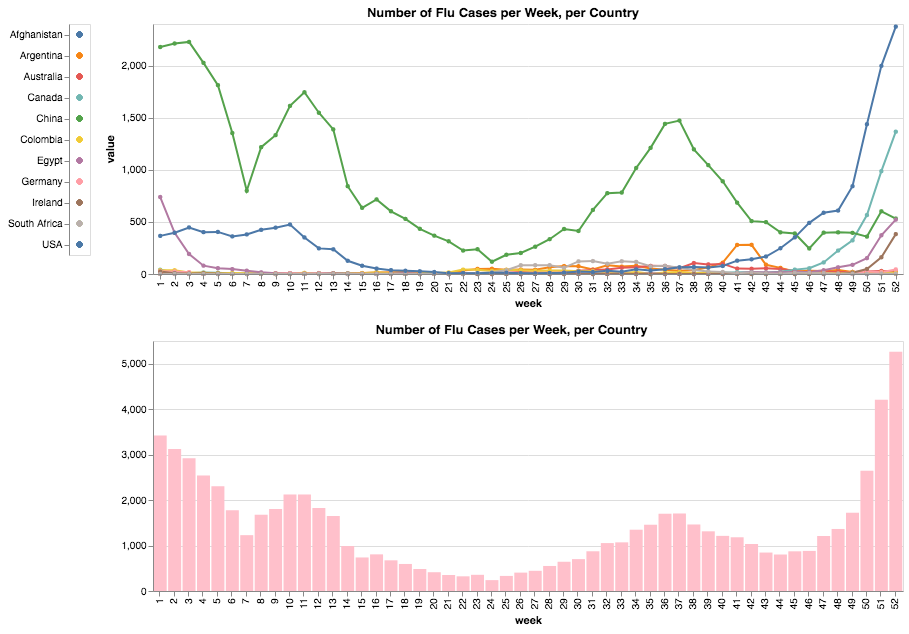

In [35]:
click = alt.selection_multi(encodings=['color'])
brush = alt.selection_interval(encodings=['x'])

line = alt.Chart(normed).mark_line(point=alt.MarkConfig(shape='circle',size=20)).encode(
    y='value:Q',
    x='week:N',
    color=alt.Color('country:N',legend=None),
    tooltip=['week','value']
).properties(
    height=250,
    width=750,
    title="Number of Flu Cases per Week, per Country",
    selection=click
).transform_filter(
    brush
).transform_filter(
    click
)

bar = alt.Chart(normed).mark_bar().encode(
    alt.X('week:N'),
    alt.Y('sum(value):Q',title=None),
    color = alt.value('pink')
).properties(
    height=250,
    width=750,
    title="Number of Flu Cases per Week, per Country"
).add_selection(
    brush
)


legend = alt.Chart(normed).mark_circle().encode(
    y = alt.Y('country:N',title=None),
    color = alt.condition(click, alt.Color('country:N', legend=None), alt.value('gray'))
).properties(
    selection=click
)


legend | line & bar

## Visualization 2

#### Create an Overview+Detail Plot Showing Flu Cases per Country

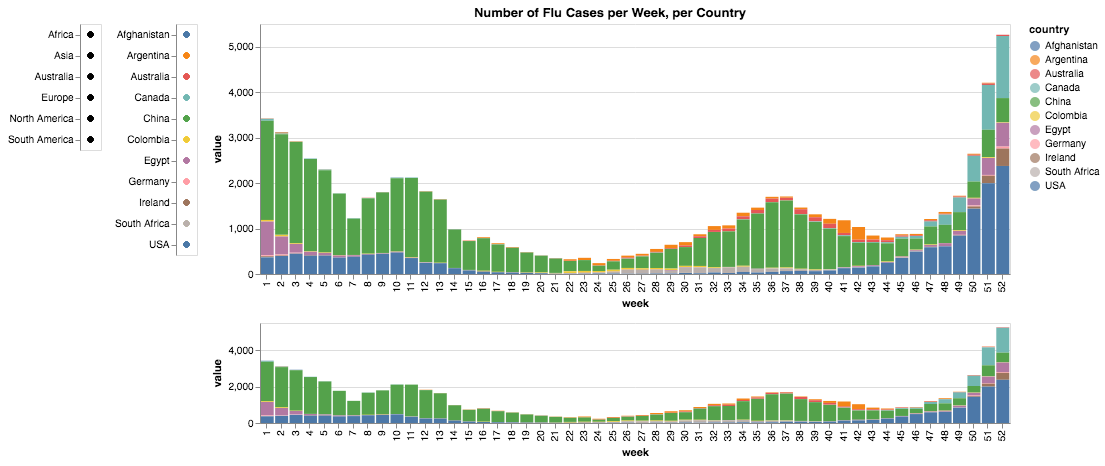

In [54]:
click = alt.selection_multi(encodings=['y'])
brush = alt.selection_interval(encodings=['x'])

bar = alt.Chart(normed).mark_bar(point=alt.MarkConfig(shape='circle',size=20)).encode(
    y='value:Q',
    x='week:N',
    color=alt.Color('country:N',legend=None),
    tooltip=['country','week','value']
).properties(
    height=250,
    width=750,
    title="Number of Flu Cases per Week, per Country"
).transform_filter(
    click
).transform_filter(
    brush
)

bar_overview = alt.Chart(normed).mark_bar(point=alt.MarkConfig(shape='circle',size=20)).encode(
    y='value:Q',
    x='week:N',
    color=alt.Color('country:N',legend=None),
    tooltip=['week','value']
).properties(
    height=100,
    width=750,
    selection=brush
)

legend = alt.Chart(normed).mark_circle().encode(
    y = alt.Y('continent:N',title=None),
    color = alt.condition(click, alt.value('black'), alt.value('lightgray'))
).properties(
    selection=click
)

legend2 = alt.Chart(normed).mark_circle().encode(
    y = alt.Y('country:N',title=None),
    color = alt.condition(click, 'country:N', alt.value('lightgray'))
).properties(
    selection=click
)

legend | legend2 | bar & bar_overview

## Visualization 3
#### Create Linked Plots Showing Flu Cases per Country per Week and Total Flu Cases per Country
For this visualization we create two linked plots. One that shows flu cases per country per week and a second on that show the total of all flu cases per country.